# Harmonic Analysis - the Nyquist Frequency
#### by Elizabeth Barnes

A demonstration of the Nyquist frequency.

The code directly below disables autoscrolling in this notebook so that you can see all of the figures at the same time.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt

import importlib
import general_functions as gf
importlib.reload(gf)
gf.add_parent_dir_to_path()

from lib import class_general_functions as cgf
importlib.reload(cgf)

#.............................................
# PLOTTING COMMANDS
#.............................................
gf.cc()
plt.ioff()
COLOR_MAT = ['darkgreen','cornflowerblue','orange','orange','navy','hotpink','grey']

### Waves of different wave-lengths - and why k = N/2 is special.

In this first example, we define a window of 4 units (i.e. x-axis is 4 units long) with a sampling rate of 0.05. That is, our data's grid spacing is 0.05 units apart. This could also be called our sampling rate.

The examples below show different waves of various wavelengths and how they fit into this window. Since every wavelength can fit in two different ways (either a sine or a cosine), we plot both.

We also calculate the variance of each sine/cosine curve within the window, and give it above each panel.

In [3]:
# user-defined variables and constants
T = 4.0
t = np.arange(0.,T+0.05,0.05)
N = np.size(t)-1

print('N = ' + str(N) + ': the number of samples in our window of length ' + str(T) + ' units')

N = 80: the number of samples in our window of length 4.0 units


.........
Variance of cos for k = 1: 0.506020423716
Variance of sin for k = 1: 0.493827160494
.........


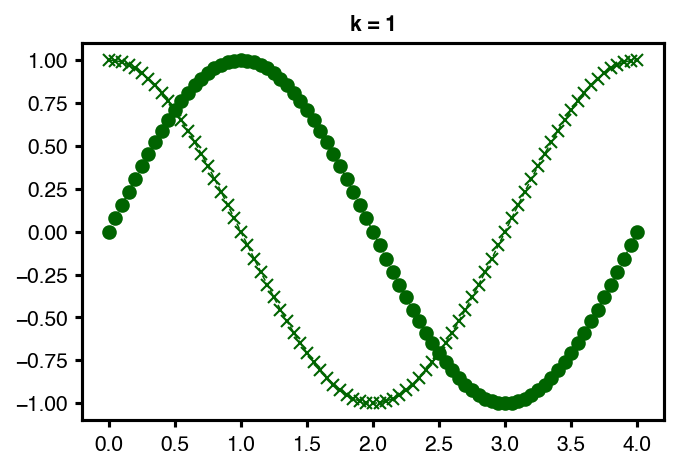

.........
Variance of cos for k = 3: 0.506020423716
Variance of sin for k = 3: 0.493827160494
.........


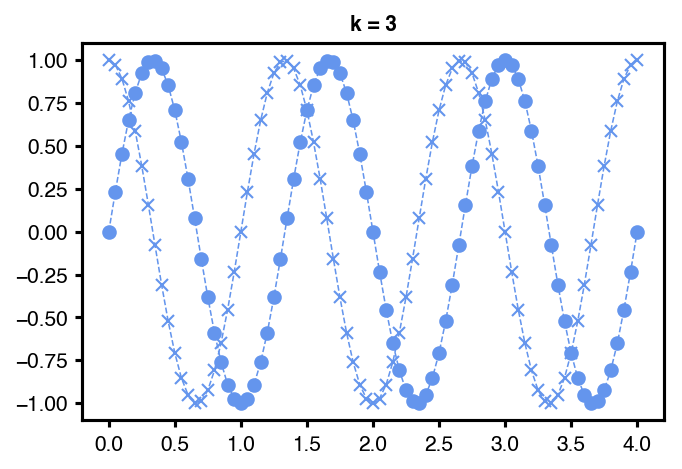

.........
Variance of cos for k = 40.0: 0.99984758421
Variance of sin for k = 40.0: 9.24077710476e-29
.........


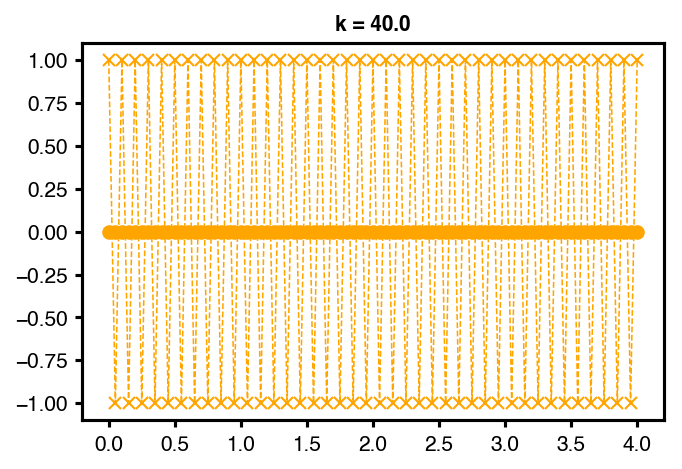

In [4]:
count = -1
gf.cc()

for k in (1,3,N/2):
    count = count + 1
    
    y1 = np.cos(2.*np.pi*k*t/T)
    y2 = np.sin(2.*np.pi*k*t/T)

    print('.........')
    print('Variance of cos for k = ' + str(k) + ': ' + str(np.var(y1)))
    print('Variance of sin for k = ' + str(k) + ': ' + str(np.var(y2)))
    print('.........')

    cgf.fig()
    plt.plot(t,y1,'x--',color = COLOR_MAT[count],linewidth = 0.75, label = 'k='+str(k))
    plt.plot(t,y2,'o--',color = COLOR_MAT[count],linewidth = 0.75)

    plt.title('k = ' + str(k))
    plt.show()


The variances for k = 1 and k = 3 are both nearly identically 0.5, as expected from our calculations in lecture. However, k = 40 is "special", that is, it is the Nyquist frequency for sampling at a rate of 0.05. This is because the Nyquist wavelength = N/2 = 40 waves in our 4 unit window. Notice what is important here though is the sampling rate of 0.05. If we modify the sampling rate, we get a different Nyquist wavelength.

This Nyquist frequency/wavelength is special because for cosine we get a variance of 1.0, while for sine we get nothing (zero). That is, the sine curve doesn't actually look like a wave, but rather, just looks like the zero line. 

### Aliasing example

In this example we show what happens when your true data has a higher freuquency than your Nyquist frequency - which again, is determined by your sampling rate. What can happen is that these higher frequencies oscillations can be _aliased_ onto lower frequencies (i.e. can masquerade as lower frequencies).

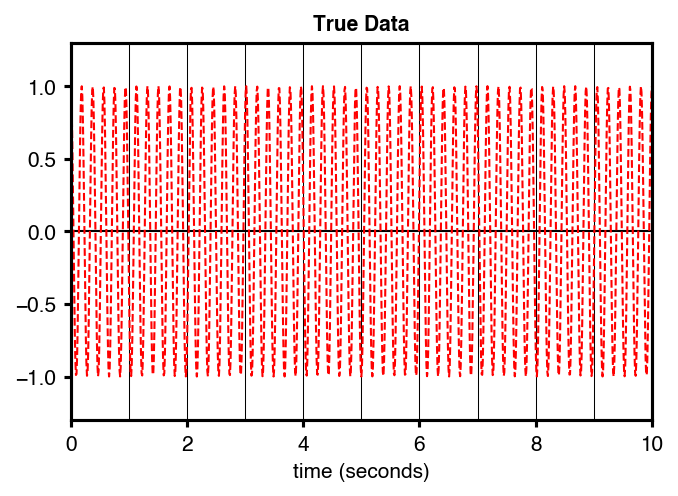

In [5]:
gf.cc()

T = 10.
t = np.arange(0.,T+.01,.01)
k = 53 #4, 5, 6, 11

fig1, ax1 = cgf.cfig(2)
plt.xlim(np.min(t),np.max(t))
plt.ylim(-1.3,1.3)
plt.xlabel('time (seconds)')
plt.title('True Data')

for i in np.arange(0,11,1):
    plt.plot((i*1.,i*1.),(-2.,2.),'-',color = 'black',linewidth = .5)

gf.plot_zero_lines()

y1 = np.cos(2.*np.pi*k*t/T)
y2 = np.sin(2.*np.pi*k*t/T)

plt.plot(t,y1,'--',color = 'red', linewidth = 1.)

t1 = np.arange(np.min(t),np.max(t)+1,1)

y11 = np.cos(2.*np.pi*k*t1/T)
y22 = np.sin(2.*np.pi*k*t1/T)

fig1

Now let's imagine that we have an instrument out in the field that only takes a measurement every 1 second. So, let's use blue dots to denote the measurements that we take.

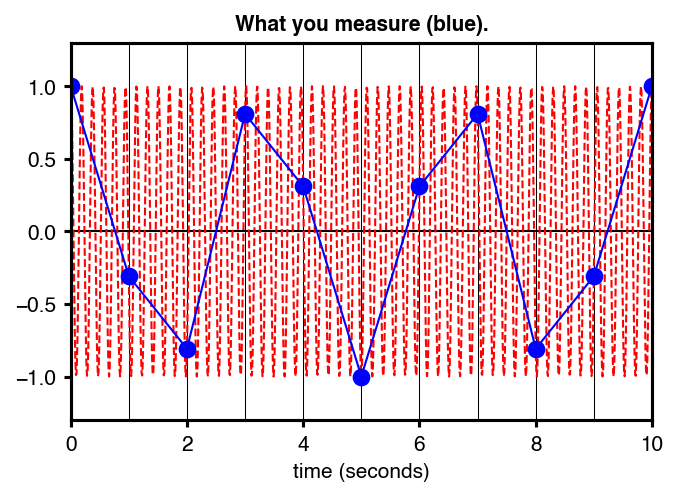

In [6]:
plt.title('What you measure (blue).')
plt.plot(t1,y11,'.',color = 'blue',markersize = 15)
plt.plot(t1,y11,'-',color = 'blue',markersize = 15, linewidth = 1.)

fig1

Look at what happened! That blue dots - that is, what we measure, make it look like our data is oscillating at much lower of a frequency than it actually is! That is, the true frequency of our data was _aliased_ onto a wavenumber of k = 3! 

This example demonstrates how important the Nyquist frequency is, and how important it is to know something about your data and its oscllations when you are designing a measurement/sampling strategy.